In [2]:
import sys
sys.path.append(".")

In [50]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [24]:
mat = loadmat("data/XJTU/charge/batch-1.mat")
battery = mat["battery"]

data = []
label = []

battery.shape # (1,8)

current_battery = battery[0,0][0]
print(current_battery.shape)

#current_battery[0,0]

for i in range(current_battery.shape[1]):
    cycle_data = current_battery[0,i]
    current = cycle_data["current_A"]
    voltage = cycle_data["voltage_V"]
    temperature = cycle_data["temperature_C"]
    charge_cycle = np.concatenate([current, voltage, temperature], axis=0)
    data.append(charge_cycle.T)
    
    capacity = cycle_data["capacity"]
    label.append(capacity.T)
    
    print(charge_cycle.shape, capacity.shape)
    break
# data = np.array(data, dtype=np.float32)
# label = np.array(label, dtype=np.float32)

(1, 389)
(3, 128) (1, 1)


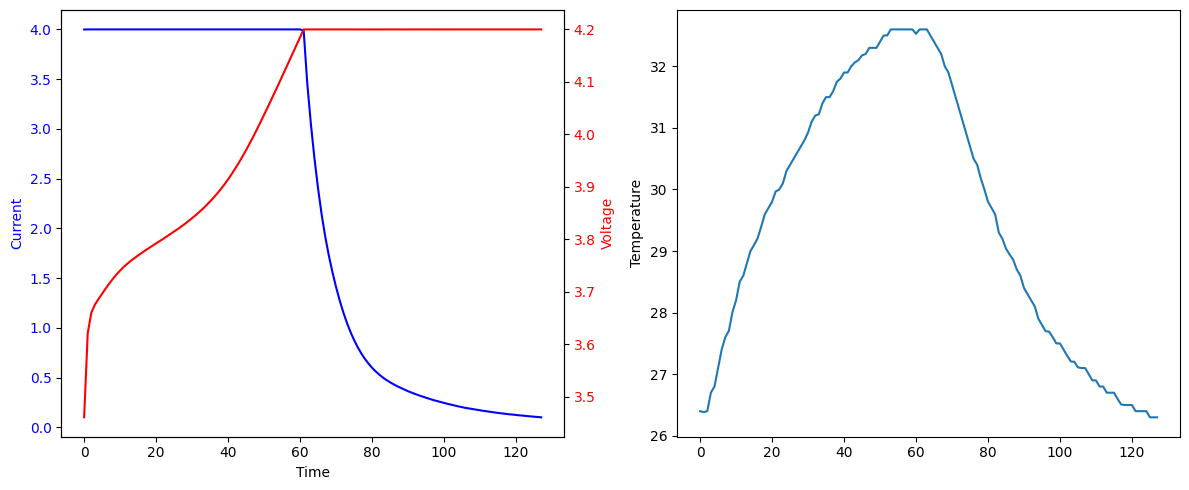

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot current on the left y-axis
ax[0].plot(current.reshape(-1,1), 'b-', label='Current')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Current', color='b')
ax[0].tick_params(axis='y', labelcolor='b')

# Create a second y-axis for voltage
ax2 = ax[0].twinx()
ax2.plot(voltage.reshape(-1,1), 'r-', label='Voltage')
ax2.set_ylabel('Voltage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax[1].plot(temperature.reshape(-1,1), label="Temperature")
ax[1].set_ylabel("Temperature")



fig.tight_layout()  # Adjust layout to fit both labels
plt.show()

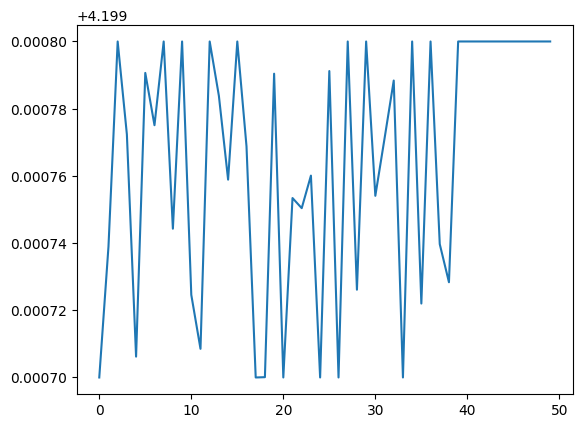

In [42]:
plt.figure()
plt.plot(voltage.reshape(-1,1)[-50:,])
plt.show()

In [26]:
print(current[0,:5])
print(current[0,-5:])
print(voltage[0,:5])
print(voltage[0,-5:])

[3.9988     3.99993113 3.99993701 4.         4.        ]
[0.11269115 0.10951772 0.10686911 0.104      0.1       ]
[3.4606     3.62112019 3.65993307 3.67548228 3.6861044 ]
[4.1998 4.1998 4.1998 4.1998 4.1998]


In [47]:
abc = np.random.randn(300,3,128)
print(abc.shape)
np.transpose(abc, axes=(0,2,1)).shape


(300, 3, 128)


(300, 128, 3)

In [49]:
abc = np.random.randn(289,1)
np.expand_dims(abc, -1).shape

(289, 1, 1)

In [51]:
train_x = torch.randn(2822,3,128)
train_y = torch.randn(2822,1,1)

from torch.utils.data import DataLoader, TensorDataset

dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(dataset, batch_size=128, shuffle=True, drop_last=False)

